# Modelling

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Pre Processing Features

### Company level data

In [237]:
comp_df = pd.read_csv('fundamentals_annual/shifted_data.csv', index_col='Unnamed: 0')
print(comp_df.columns)
comp_df.datadate = pd.to_datetime(comp_df.datadate)#.dt.year
# comp_df.set_index('datadate', inplace= True)
comp_df#.head(5)

Index(['gvkey', 'datadate', 'fyear', 'fyr', 'acominc', 'act', 'ap', 'at', 'ch',
       'citotal', 'cshpri', 'dltt', 'dvt', 'ebit', 'ebitda', 'gp', 'icapt',
       'invt', 'lt', 'opeps', 'revt', 'seq', 'txdi', 'txp', 'txt', 'sic', 'ni',
       'pi', 'txpd'],
      dtype='object')


,gvkey,datadate,fyear,fyr,acominc,act,ap,at,ch,citotal,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
0,2080,2000-11-30,2000,11,1.0,136.0,20.0,346.0,3.0,3.0,...,1.0,367.0,249.0,1.0,0.0,4.0,2511,-3.0,15.0,1.0
1,2080,2001-11-30,2001,11,3.0,98.0,15.0,301.0,5.0,3.0,...,0.0,305.0,234.0,-1.0,0.0,-2.0,2511,6.0,-4.0,1.0
2,2080,2002-11-30,2002,11,1.0,102.0,17.0,290.0,1.0,3.0,...,0.0,323.0,229.0,2.0,0.0,2.0,2511,-1.0,9.0,0.0
3,2080,2003-11-30,2003,11,2.0,100.0,15.0,280.0,15.0,3.0,...,0.0,316.0,220.0,-2.0,1.0,0.0,2511,8.0,4.0,-4.0
4,2080,2004-11-30,2004,11,2.0,102.0,19.0,297.0,4.0,3.0,...,0.0,315.0,221.0,1.0,0.0,2.0,2511,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,271841,2015-12-31,2015,12,0.0,1090.0,105.0,1707.0,20.0,18.0,...,0.0,627.0,781.0,-5.0,25.0,1.0,1520,-358.0,19.0,1.0
2756,271841,2016-12-31,2016,12,0.0,1045.0,87.0,1601.0,9.0,-358.0,...,-2.0,302.0,592.0,27.0,15.0,30.0,1520,-257.0,-155.0,3.0
2757,271841,2017-12-31,2017,12,0.0,523.0,77.0,868.0,8.0,-257.0,...,-20.0,198.0,228.0,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0
2758,271841,2018-12-31,2018,12,0.0,438.0,60.0,652.0,8.0,-109.0,...,-4.0,270.0,126.0,-7.0,14.0,-6.0,1520,-7.0,-115.0,0.0


#### To fyear or not to fyear?

For now, just taking datadate year

In [238]:
comp_df.iloc[np.where(comp_df.datadate.dt.year != comp_df.fyear)]

,gvkey,datadate,fyear,fyr,acominc,act,ap,at,ch,citotal,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
52,2820,2002-03-31,2001,3,0.0,39.0,8.0,117.0,0.0,5.0,...,0.0,95.0,56.0,0.0,0.0,0.0,2452,-5.0,3.0,0.0
53,2820,2003-03-31,2002,3,0.0,35.0,3.0,111.0,0.0,5.0,...,0.0,110.0,92.0,0.0,0.0,0.0,2452,6.0,6.0,0.0
54,2820,2004-03-31,2003,3,0.0,54.0,6.0,129.0,30.0,5.0,...,1.0,128.0,97.0,2.0,0.0,3.0,2452,10.0,9.0,1.0
55,2820,2005-03-31,2004,3,0.0,70.0,5.0,145.0,46.0,10.0,...,1.0,157.0,108.0,2.0,0.0,6.0,2452,15.0,15.0,3.0
56,2820,2006-03-31,2005,3,0.0,89.0,6.0,168.0,15.0,15.0,...,2.0,189.0,125.0,2.0,0.0,8.0,2452,11.0,23.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,198058,2016-03-31,2015,3,-81.0,1669.0,131.0,2566.0,702.0,825.0,...,4.0,4712.0,1995.0,-2.0,51.0,334.0,2300,552.0,1172.0,273.0
2704,198058,2017-03-31,2016,3,-81.0,1164.0,176.0,2409.0,227.0,552.0,...,3.0,4493.0,1592.0,-61.0,60.0,137.0,2300,591.0,688.0,171.0
2705,198058,2018-03-31,2017,3,50.0,1262.0,294.0,4059.0,163.0,723.0,...,4.0,4718.0,2017.0,9.0,77.0,149.0,2300,543.0,741.0,103.0
2706,198058,2019-03-31,2018,3,-66.0,1729.0,371.0,6650.0,172.0,426.0,...,4.0,5238.0,2429.0,-71.0,34.0,79.0,2300,-223.0,621.0,172.0


In [239]:
comp_df.iloc[np.where(comp_df.datadate.dt.year == comp_df.fyear)]

,gvkey,datadate,fyear,fyr,acominc,act,ap,at,ch,citotal,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
0,2080,2000-11-30,2000,11,1.0,136.0,20.0,346.0,3.0,3.0,...,1.0,367.0,249.0,1.0,0.0,4.0,2511,-3.0,15.0,1.0
1,2080,2001-11-30,2001,11,3.0,98.0,15.0,301.0,5.0,3.0,...,0.0,305.0,234.0,-1.0,0.0,-2.0,2511,6.0,-4.0,1.0
2,2080,2002-11-30,2002,11,1.0,102.0,17.0,290.0,1.0,3.0,...,0.0,323.0,229.0,2.0,0.0,2.0,2511,-1.0,9.0,0.0
3,2080,2003-11-30,2003,11,2.0,100.0,15.0,280.0,15.0,3.0,...,0.0,316.0,220.0,-2.0,1.0,0.0,2511,8.0,4.0,-4.0
4,2080,2004-11-30,2004,11,2.0,102.0,19.0,297.0,4.0,3.0,...,0.0,315.0,221.0,1.0,0.0,2.0,2511,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,271841,2015-12-31,2015,12,0.0,1090.0,105.0,1707.0,20.0,18.0,...,0.0,627.0,781.0,-5.0,25.0,1.0,1520,-358.0,19.0,1.0
2756,271841,2016-12-31,2016,12,0.0,1045.0,87.0,1601.0,9.0,-358.0,...,-2.0,302.0,592.0,27.0,15.0,30.0,1520,-257.0,-155.0,3.0
2757,271841,2017-12-31,2017,12,0.0,523.0,77.0,868.0,8.0,-257.0,...,-20.0,198.0,228.0,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0
2758,271841,2018-12-31,2018,12,0.0,438.0,60.0,652.0,8.0,-109.0,...,-4.0,270.0,126.0,-7.0,14.0,-6.0,1520,-7.0,-115.0,0.0


In [240]:
comp_df.datadate = comp_df.datadate.dt.year
comp_df

,gvkey,datadate,fyear,fyr,acominc,act,ap,at,ch,citotal,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
0,2080,2000,2000,11,1.0,136.0,20.0,346.0,3.0,3.0,...,1.0,367.0,249.0,1.0,0.0,4.0,2511,-3.0,15.0,1.0
1,2080,2001,2001,11,3.0,98.0,15.0,301.0,5.0,3.0,...,0.0,305.0,234.0,-1.0,0.0,-2.0,2511,6.0,-4.0,1.0
2,2080,2002,2002,11,1.0,102.0,17.0,290.0,1.0,3.0,...,0.0,323.0,229.0,2.0,0.0,2.0,2511,-1.0,9.0,0.0
3,2080,2003,2003,11,2.0,100.0,15.0,280.0,15.0,3.0,...,0.0,316.0,220.0,-2.0,1.0,0.0,2511,8.0,4.0,-4.0
4,2080,2004,2004,11,2.0,102.0,19.0,297.0,4.0,3.0,...,0.0,315.0,221.0,1.0,0.0,2.0,2511,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,271841,2015,2015,12,0.0,1090.0,105.0,1707.0,20.0,18.0,...,0.0,627.0,781.0,-5.0,25.0,1.0,1520,-358.0,19.0,1.0
2756,271841,2016,2016,12,0.0,1045.0,87.0,1601.0,9.0,-358.0,...,-2.0,302.0,592.0,27.0,15.0,30.0,1520,-257.0,-155.0,3.0
2757,271841,2017,2017,12,0.0,523.0,77.0,868.0,8.0,-257.0,...,-20.0,198.0,228.0,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0
2758,271841,2018,2018,12,0.0,438.0,60.0,652.0,8.0,-109.0,...,-4.0,270.0,126.0,-7.0,14.0,-6.0,1520,-7.0,-115.0,0.0


#### Continuing with data Date year

What are the following:
- acominc

In [257]:
comp_data = comp_df.drop(['fyear','fyr'], axis= 1)
comp_data.set_index('datadate', inplace= True)
comp_data

,gvkey,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
datadate,,,,,,,,,,,,,,,,,,,,,
2000,2080,1.0,136.0,20.0,346.0,3.0,3.0,11.0,45.0,9.0,...,1.0,367.0,249.0,1.0,0.0,4.0,2511,-3.0,15.0,1.0
2001,2080,3.0,98.0,15.0,301.0,5.0,3.0,11.0,7.0,9.0,...,0.0,305.0,234.0,-1.0,0.0,-2.0,2511,6.0,-4.0,1.0
2002,2080,1.0,102.0,17.0,290.0,1.0,3.0,11.0,3.0,9.0,...,0.0,323.0,229.0,2.0,0.0,2.0,2511,-1.0,9.0,0.0
2003,2080,2.0,100.0,15.0,280.0,15.0,3.0,11.0,0.0,9.0,...,0.0,316.0,220.0,-2.0,1.0,0.0,2511,8.0,4.0,-4.0
2004,2080,2.0,102.0,19.0,297.0,4.0,3.0,11.0,15.0,9.0,...,0.0,315.0,221.0,1.0,0.0,2.0,2511,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,271841,0.0,1090.0,105.0,1707.0,20.0,18.0,183.0,275.0,4.0,...,0.0,627.0,781.0,-5.0,25.0,1.0,1520,-358.0,19.0,1.0
2016,271841,0.0,1045.0,87.0,1601.0,9.0,-358.0,181.0,200.0,0.0,...,-2.0,302.0,592.0,27.0,15.0,30.0,1520,-257.0,-155.0,3.0
2017,271841,0.0,523.0,77.0,868.0,8.0,-257.0,13.0,161.0,0.0,...,-20.0,198.0,228.0,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0


<AxesSubplot:>

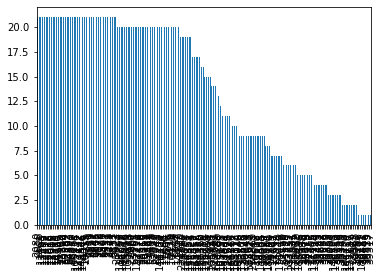

In [9]:
comp_data.gvkey.value_counts().plot(kind = 'bar')

Drop companies which don't have 20 years of data?

### Treasury/Inflation Data

,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
caldt,,,,,,,,,,
2001,0.033705,0.040867,0.040302,0.076023,0.082663,0.086428,0.074351,0.044809,0.037786,0.015517
2002,0.163857,0.172186,0.146641,0.149588,0.131414,0.067811,0.034147,0.017951,0.016339,0.023769
2003,0.006738,0.024512,0.012763,0.026151,0.028316,0.019835,0.014680,0.011604,0.010182,0.018794
2004,0.087015,0.082811,0.051849,0.040793,0.023355,0.007544,0.006780,0.013080,0.012005,0.032557
2005,0.089353,0.076566,0.031030,0.017948,0.006416,0.015241,0.022705,0.030790,0.029633,0.034156


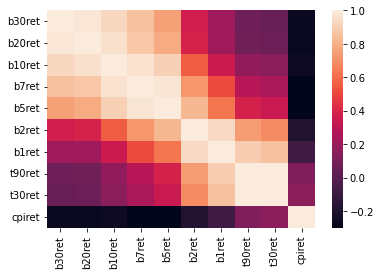

In [252]:
treasury_data = pd.read_csv('treasury_inflation/treasury_inflation.csv')
treasury_data.caldt = pd.to_datetime(treasury_data.caldt).dt.year
treasury_data.set_index('caldt', inplace = True)
# ((treasury_data.cpiret + 1).cumprod() - 1).plot()     #plot cpiret/ Inflation Rate
sns.heatmap(treasury_data.corr())
treasury_data.head()

The returns on the bills are highly correlated.

Thus, taking all of them is redundant.

We will take one from each:
- short term _(t90ret)_
- long term _(b5ret)_

We also take the _cpiret_ (Inflation rate)

,t90ret,b5ret,cpiret
t90ret,1.000000,0.383748,0.119947
b5ret,0.383748,1.000000,-0.298397
cpiret,0.119947,-0.298397,1.000000


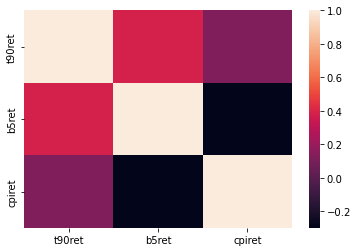

In [254]:
sns.heatmap(treasury_data[['t90ret','b5ret','cpiret']].corr())
# sns.heatmap(treasury_data[['t30ret','b5ret','b30ret','cpiret']].corr())
treasury_data = treasury_data[['t90ret','b5ret','cpiret']]
treasury_data.corr()

In [255]:
treasury_data

,t90ret,b5ret,cpiret
caldt,,,
2001,0.044809,0.082663,0.015517
2002,0.017951,0.131414,0.023769
2003,0.011604,0.028316,0.018794
2004,0.013080,0.023355,0.032557
2005,0.030790,0.006416,0.034156
2006,0.048354,0.027717,0.025408
2007,0.050863,0.101754,0.040814
2008,0.020446,0.131459,0.000915
2009,0.002232,-0.024693,0.027213


## Market Data

In [210]:
index_df = pd.read_csv('index_prices/index_prices.csv')
index_df.datadate = pd.to_datetime(index_df.datadate)
index_df.set_index('datadate', inplace= True)
# index_data.set_index(['tic','datadate'], inplace= True)
index_df.head()

,gvkeyx,bkvlps,cshtrm,dvpsxm,dvrate,epsx12,prccm,prchm,prclm,conm,indextype,tic,spii,spmi,indexcat
datadate,,,,,,,,,,,,,,,
1990-01-31,3,NaN,NaN,0.92,11.40,22.869,329.0798,360.5898,319.8298,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-02-28,3,NaN,NaN,0.92,11.40,22.869,331.8899,336.0898,322.0999,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-03-31,3,NaN,NaN,0.92,11.04,21.670,339.9400,343.5300,332.7400,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-04-30,3,NaN,NaN,1.07,11.04,21.670,330.7998,347.2998,327.7598,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-05-31,3,NaN,NaN,1.07,11.04,21.670,361.2300,362.2598,330.7998,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P


In [211]:
# Only interested in the close price
index_data = index_df[['tic','prccm']]
index_data

,tic,prccm
datadate,,
1990-01-31,I0003,329.0798
1990-02-28,I0003,331.8899
1990-03-31,I0003,339.9400
1990-04-30,I0003,330.7998
1990-05-31,I0003,361.2300
...,...,...
2021-09-30,AHD.I,506.6692
2021-10-31,AHD.I,519.2445
2021-11-30,AHD.I,529.0903


In [212]:
from scipy.stats.mstats import gmean

def annual_returns(close_price):
    # print(close_price, gmean(close_price.pct_change()[1:] + 1) -1)
    close_price.fillna(close_price.mean(), inplace = True)
    return gmean(close_price.pct_change()[1:] + 1) -1

In [213]:
index_data.groupby(['tic'])['prccm'].resample('A').agg(annual_returns).unstack().T

/Users/rchaks/opt/anaconda3/envs/finance/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/rchaks/opt/anaconda3/envs/finance/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tic,AHD.I,CI0775,CI1040,CI1311,I0003
datadate,,,,,
1990-12-31,NaN,-0.005401,-0.027032,-0.005709,0.000314
1991-12-31,NaN,0.024472,0.001774,-0.013178,0.017688
1992-12-31,NaN,-0.004126,0.005056,0.003941,0.005815
1993-12-31,NaN,0.008754,0.068482,0.024744,0.005575
1994-12-31,0.000000,-0.009898,-0.010919,-0.010245,-0.004309
1995-12-31,0.014851,0.022064,0.019097,0.017911,0.024803
1996-12-31,0.000125,0.010246,-0.005868,0.028377,0.013953
1997-12-31,0.018264,0.001792,-0.045402,-0.003439,0.019328
1998-12-31,0.002091,0.011623,-0.012651,-0.028258,0.020786


In [214]:
index_df[['tic','conm']].drop_duplicates()

,tic,conm
datadate,,
1990-01-31,I0003,S&P 500 Comp-Ltd
1990-01-31,CI1040,S&P/TSX-Gold/Precious Minrls
1990-01-31,CI1311,S&P/TSX-Oil And Gas
1990-01-31,CI0775,S&P/TSX-Consumer Products
1992-12-31,AHD.I,SP500 Household Durables .I


Since only S&P500 and S&P500 Household Durables have recent data, we consider only these market indicators

### CHECK?!!!!!

In [215]:
index_data = index_data.groupby(['tic'])['prccm'].resample('A').agg(annual_returns).unstack().T
index_data = index_data[['I0003','AHD.I']].dropna()
index_data.index = index_data.index.year
index_data.rename({'I0003':'SNP500', "AHD.I":'SNP500_CD'}, axis=1, inplace= True)
index_data

/Users/rchaks/opt/anaconda3/envs/finance/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/rchaks/opt/anaconda3/envs/finance/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tic,SNP500,SNP500_CD
datadate,,
1994,-0.004309,0.000000
1995,0.024803,0.014851
1996,0.013953,0.000125
1997,0.019328,0.018264
1998,0.020786,0.002091
1999,0.012640,-0.015632
2000,-0.004957,-0.002144
2001,-0.015676,0.012427
2002,-0.022509,-0.003884


## Merge

In [231]:
# treasury_data.join(index_data).to_csv('market_data.csv')
treasury_data.join(index_data)

,t30ret,b30ret,cpiret,SNP500,SNP500_CD
caldt,,,,,
2001,0.037786,0.033705,0.015517,-0.015676,0.012427
2002,0.016339,0.163857,0.023769,-0.022509,-0.003884
2003,0.010182,0.006738,0.018794,0.024097,0.029007
2004,0.012005,0.087015,0.032557,0.006291,0.016300
2005,0.029633,0.089353,0.034156,0.005029,0.007722
2006,0.047855,-0.012106,0.025408,0.009365,-0.007227
2007,0.046747,0.102542,0.040814,0.001886,-0.036031
2008,0.014742,0.414301,0.000915,-0.037706,-0.054795
2009,0.000966,-0.259603,0.027213,0.027671,0.044671


In [277]:
df = comp_data.iloc[comp_data.index != 2000].join(treasury_data.join(index_data))
data = df.drop(['gvkey'], axis = 1)
data

,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,ebit,...,txt,sic,ni,pi,txpd,t90ret,b5ret,cpiret,SNP500,SNP500_CD
2001,3.0,98.0,15.0,301.0,5.0,3.0,11.0,7.0,9.0,-3.0,...,-2.0,2511,6.0,-4.0,1.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,0.0,9.0,2.0,9.0,0.0,-1.0,1.0,0.0,1.0,1.0,...,0.0,2330,0.0,1.0,0.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,-45.0,1400.0,214.0,3157.0,108.0,143.0,87.0,600.0,43.0,191.0,...,47.0,3510,78.0,132.0,-27.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,0.0,62.0,8.0,90.0,1.0,1.0,8.0,47.0,0.0,-9.0,...,-1.0,2211,27.0,-74.0,-1.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,0.0,126.0,27.0,289.0,1.0,-9.0,11.0,109.0,1.0,6.0,...,-5.0,2211,-4.0,-13.0,-1.0,0.044809,0.082663,0.015517,-0.015676,0.012427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,-2.0,80.0,6.0,119.0,31.0,20.0,33.0,0.0,13.0,25.0,...,5.0,3730,29.0,24.0,4.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,-567.0,3408.0,948.0,7698.0,909.0,-25.0,352.0,4099.0,213.0,824.0,...,-108.0,2300,77.0,-184.0,116.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,-225.0,1807.0,79.0,3281.0,1093.0,637.0,130.0,611.0,0.0,889.0,...,251.0,2300,588.0,897.0,305.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,0.0,218.0,20.0,535.0,49.0,16.0,33.0,113.0,0.0,30.0,...,5.0,3100,8.0,20.0,6.0,0.006920,0.073770,0.013621,0.013940,0.010226


cpiret       0.013380
SNP500_CD    0.016801
t90ret       0.030080
SNP500       0.046488
b5ret        0.050148
txdi         0.051045
sic          0.077729
opeps        0.094343
acominc      0.158367
dltt         0.248742
revt         0.267671
ap           0.283939
act          0.292884
ch           0.300692
lt           0.310998
cshpri       0.321549
at           0.350272
invt         0.370339
txp          0.375504
icapt        0.381107
seq          0.413067
gp           0.429577
txt          0.449451
ebitda       0.550562
txpd         0.552571
dvt          0.581749
ebit         0.677976
citotal      0.687801
pi           0.701745
ni           1.000000
Name: ni, dtype: float64

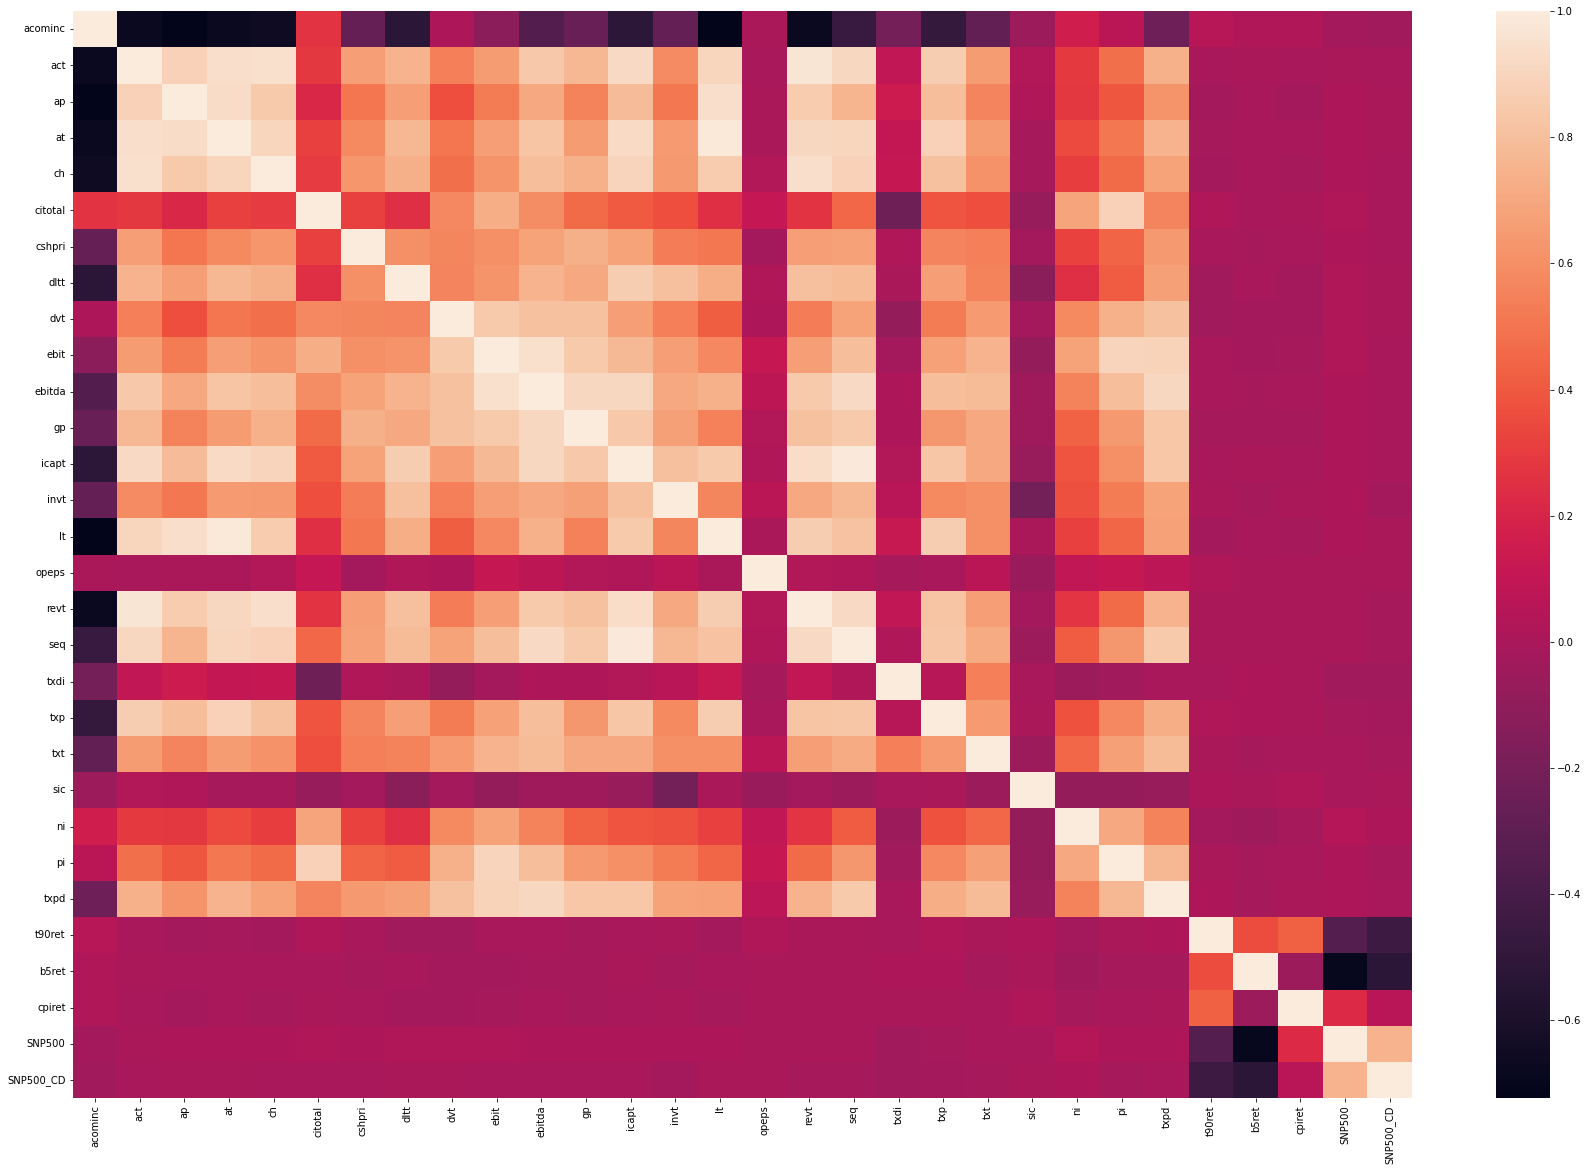

In [290]:
plt.gcf().set_size_inches(30, 20,  forward=True)
sns.heatmap(data.corr())
abs(data.corr()['ni']).sort_values()

In [278]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = data['ni'], data.drop(['ni'], axis = 1)#dmatrices('ni ~ ', data=data, return_type='dataframe')
X

,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,ebit,...,txp,txt,sic,pi,txpd,t90ret,b5ret,cpiret,SNP500,SNP500_CD
2001,3.0,98.0,15.0,301.0,5.0,3.0,11.0,7.0,9.0,-3.0,...,0.0,-2.0,2511,-4.0,1.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,0.0,9.0,2.0,9.0,0.0,-1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,2330,1.0,0.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,-45.0,1400.0,214.0,3157.0,108.0,143.0,87.0,600.0,43.0,191.0,...,0.0,47.0,3510,132.0,-27.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,0.0,62.0,8.0,90.0,1.0,1.0,8.0,47.0,0.0,-9.0,...,0.0,-1.0,2211,-74.0,-1.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,0.0,126.0,27.0,289.0,1.0,-9.0,11.0,109.0,1.0,6.0,...,1.0,-5.0,2211,-13.0,-1.0,0.044809,0.082663,0.015517,-0.015676,0.012427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,-2.0,80.0,6.0,119.0,31.0,20.0,33.0,0.0,13.0,25.0,...,0.0,5.0,3730,24.0,4.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,-567.0,3408.0,948.0,7698.0,909.0,-25.0,352.0,4099.0,213.0,824.0,...,0.0,-108.0,2300,-184.0,116.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,-225.0,1807.0,79.0,3281.0,1093.0,637.0,130.0,611.0,0.0,889.0,...,26.0,251.0,2300,897.0,305.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,0.0,218.0,20.0,535.0,49.0,16.0,33.0,113.0,0.0,30.0,...,2.0,5.0,3100,20.0,6.0,0.006920,0.073770,0.013621,0.013940,0.010226


In [279]:
y

2001      6.0
2001      0.0
2001     78.0
2001     27.0
2001     -4.0
        ...  
2020     29.0
2020     77.0
2020    588.0
2020      8.0
2020    -62.0
Name: ni, Length: 2468, dtype: float64

In [280]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

# data = load_boston()
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = data.target


def stepwise_selection(X, y, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  citotal                        with p-value 0.0
Add  ebit                           with p-value 2.90276e-75
Add  ebitda                         with p-value 4.70181e-39
Add  lt                             with p-value 9.1077e-39
Add  acominc                        with p-value 2.25139e-20
Add  ch                             with p-value 2.22861e-10
Add  icapt                          with p-value 6.15682e-14
Add  pi                             with p-value 1.54016e-09
Add  dvt                            with p-value 4.17063e-10
Add  txt                            with p-value 2.30845e-10
Add  seq                            with p-value 1.52061e-07
Add  invt                           with p-value 1.25358e-12
Add  txp                            with p-value 0.000130816
Add  at                             with p-value 3.54226e-05
Add  cshpri                         with p-value 0.00240365
Add  ap                             with p-value 0.00589189
Add  gp                            